In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

verkhovazhye ru
avarua ck
kosa ru
busselton au
cartagena es
busselton au
gazojak tm
tasiilaq gl
hilo us
myanaung mm
kapaa us
raudeberg no
churapcha ru
maragogi br
arraial do cabo br
matagami ca
upata ve
mahebourg mu
albany au
kasulu tz
port alfred za
barentsburg sj
antalaha mg
butaritari ki
mataura pf
punta arenas cl
tasiilaq gl
barentsburg sj
hithadhoo mv
atuona pf
tiksi ru
mataura pf
la rioja ar
bredasdorp za
pangoa pe
avarua ck
punta arenas cl
birao cf
illoqqortoormiut gl
cape town za
cam ranh vn
sofiysk ru
kodiak us
ostersund se
tuktoyaktuk ca
thompson ca
barrow us
minsk mazowiecki pl
hilo us
aksu kz
palia kalan in
galiwinku au
hilo us
rikitea pf
kapaa us
cape town za
hermanus za
punta arenas cl
tura ru
butaritari ki
manyana bw
chokurdakh ru
komsomolskiy ru
puerto ayora ec
upernavik gl
qaanaaq gl
illoqqortoormiut gl
kahului us
albany au
mayo ca
samusu ws
grand river south east mu
isangel vu
najran sa
qaanaaq gl
punta arenas cl
albany au
kruisfontein za
nouadhibou mr
aasiaat gl
ombo

butaritari ki
san cristobal ec
pecos us
quatre cocos mu
san gabriel casa blanca mx
bulgan mn
belushya guba ru
flinders au
pangnirtung ca
shieli kz
wanxian cn
vao nc
bredasdorp za
samalaeulu ws
ushuaia ar
kapaa us
komsomolskiy ru
baykit ru
carnarvon au
constitucion mx
palmer us
hilo us
atuona pf
milici ba
greensburg us
ushuaia ar
atuona pf
rikitea pf
dunedin nz
sorong id
bargal so
zheleznodorozhnyy ru
vaini to
linqiong cn
maragogi br
port alfred za
norman wells ca
kruisfontein za
avarua ck
hermanus za
victoria sc
bethel us
port alfred za
ternate id
east london za
khromtau kz
sitka us
illoqqortoormiut gl
atuona pf
rikitea pf
faanui pf
jamestown sh
longyearbyen sj
hermanus za
allende mx
upernavik gl
stephenville ca
lata sb
northam au
icatu br
ilulissat gl
provideniya ru
merrill us
hithadhoo mv
east london za
troitskoye ru
arraial do cabo br
mataura pf
hilo us
hermanus za
cherskiy ru
ushuaia ar
port elizabeth za
shaowu cn
hermanus za
souillac mu
dingle ie
quatre cocos mu
minna ng
busselton

tezu in
taolanaro mg
taolanaro mg
ialibu pg
at-bashi kg
basco ph
svetlogorsk ru
nikolskoye ru
ushuaia ar
port elizabeth za
jamestown sh
hilo us
samatau ws
busselton au
sitka us
east london za
elko us
salalah om
belaya gora ru
mogochin ru


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dfb84eeff8f8990d42243f4ec5e39264


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dfb84eeff8f8990d42243f4ec5e39264&q=Boston


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | verkhovazhye
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | kosa
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | cartagena
Processing Record 6 of Set 1 | gazojak
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | myanaung
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | raudeberg
Processing Record 12 of Set 1 | churapcha
Processing Record 13 of Set 1 | maragogi
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | matagami
Processing Record 16 of Set 1 | upata
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | kasulu
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 22 of Set 1 | antalaha
Processing Record 

Processing Record 35 of Set 4 | vila franca do campo
Processing Record 36 of Set 4 | tiarei
Processing Record 37 of Set 4 | chifeng
Processing Record 38 of Set 4 | artyk
City not found. Skipping...
Processing Record 39 of Set 4 | baboua
City not found. Skipping...
Processing Record 40 of Set 4 | opotiki
Processing Record 41 of Set 4 | ilulissat
Processing Record 42 of Set 4 | soyo
Processing Record 43 of Set 4 | sedelnikovo
City not found. Skipping...
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | khatanga
Processing Record 46 of Set 4 | vardo
Processing Record 47 of Set 4 | port blair
Processing Record 48 of Set 4 | cairns
Processing Record 49 of Set 4 | airai
Processing Record 50 of Set 4 | atar
Processing Record 1 of Set 5 | furukawa
Processing Record 2 of Set 5 | limbang
Processing Record 3 of Set 5 | young
Processing Record 4 of Set 5 | paita
Processing Record 5 of Set 5 | karratha
Processing Record 6 of Set 5 | haines junction
Processing Record 7 of 

Processing Record 19 of Set 8 | hami
Processing Record 20 of Set 8 | indre arna
Processing Record 21 of Set 8 | mulchen
Processing Record 22 of Set 8 | fort nelson
Processing Record 23 of Set 8 | aitape
Processing Record 24 of Set 8 | praya
Processing Record 25 of Set 8 | uinskoye
Processing Record 26 of Set 8 | lavrentiya
Processing Record 27 of Set 8 | pestravka
Processing Record 28 of Set 8 | usvyaty
Processing Record 29 of Set 8 | dunedin
Processing Record 30 of Set 8 | kracheh
City not found. Skipping...
Processing Record 31 of Set 8 | den helder
Processing Record 32 of Set 8 | lagos
Processing Record 33 of Set 8 | vanimo
Processing Record 34 of Set 8 | san jose
Processing Record 35 of Set 8 | beitbridge
Processing Record 36 of Set 8 | kuryk
Processing Record 37 of Set 8 | camocim
Processing Record 38 of Set 8 | akdepe
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | naze
Processing Record 41 of Set 8 | victoria
Processing Record 42 of Set 8 | seoul
Processing

Processing Record 8 of Set 12 | kolaras
Processing Record 9 of Set 12 | marihatag
Processing Record 10 of Set 12 | kurumkan
Processing Record 11 of Set 12 | coihaique
Processing Record 12 of Set 12 | mumford
Processing Record 13 of Set 12 | chardara
Processing Record 14 of Set 12 | havoysund
Processing Record 15 of Set 12 | oboyan
Processing Record 16 of Set 12 | atchison
Processing Record 17 of Set 12 | paamiut
Processing Record 18 of Set 12 | daru
Processing Record 19 of Set 12 | oussouye
Processing Record 20 of Set 12 | limoges
Processing Record 21 of Set 12 | lebu
Processing Record 22 of Set 12 | alta floresta
Processing Record 23 of Set 12 | hay river
Processing Record 24 of Set 12 | elizabeth city
Processing Record 25 of Set 12 | fredericton
Processing Record 26 of Set 12 | behshahr
Processing Record 27 of Set 12 | acuna
City not found. Skipping...
Processing Record 28 of Set 12 | centralina
Processing Record 29 of Set 12 | ngunguru
Processing Record 30 of Set 12 | ugoofaaru
Proc

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Verkhovazhye,60.7472,42.0465,22.98,98,42,1.30,RU,2021-03-27 18:25:37
1,Avarua,-21.2078,-159.7750,80.60,83,90,11.50,CK,2021-03-27 18:29:05
2,Kosa,59.9445,54.9977,19.94,94,9,5.08,RU,2021-03-27 18:29:05
3,Busselton,-33.6500,115.3333,55.99,92,18,8.30,AU,2021-03-27 18:29:05
4,Cartagena,10.3997,-75.5144,89.60,58,40,16.11,CO,2021-03-27 18:29:06
5,Gazojak,41.1875,61.4036,56.26,40,64,9.86,TM,2021-03-27 18:29:06
6,Tasiilaq,65.6145,-37.6368,15.80,57,90,26.46,GL,2021-03-27 18:29:06
7,Hilo,19.7297,-155.0900,73.40,60,40,5.75,US,2021-03-27 18:26:10
8,Myanaung,18.2833,95.3167,83.53,32,17,2.35,MM,2021-03-27 18:29:07
9,Kapaa,22.0752,-159.3190,73.40,83,40,13.80,US,2021-03-27 18:25:55


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Verkhovazhye,RU,2021-03-27 18:25:37,60.7472,42.0465,22.98,98,42,1.30
1,Avarua,CK,2021-03-27 18:29:05,-21.2078,-159.7750,80.60,83,90,11.50
2,Kosa,RU,2021-03-27 18:29:05,59.9445,54.9977,19.94,94,9,5.08
3,Busselton,AU,2021-03-27 18:29:05,-33.6500,115.3333,55.99,92,18,8.30
4,Cartagena,CO,2021-03-27 18:29:06,10.3997,-75.5144,89.60,58,40,16.11
5,Gazojak,TM,2021-03-27 18:29:06,41.1875,61.4036,56.26,40,64,9.86
6,Tasiilaq,GL,2021-03-27 18:29:06,65.6145,-37.6368,15.80,57,90,26.46
7,Hilo,US,2021-03-27 18:26:10,19.7297,-155.0900,73.40,60,40,5.75
8,Myanaung,MM,2021-03-27 18:29:07,18.2833,95.3167,83.53,32,17,2.35
9,Kapaa,US,2021-03-27 18:25:55,22.0752,-159.3190,73.40,83,40,13.80


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [30]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1616872130.583841

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/27/21'

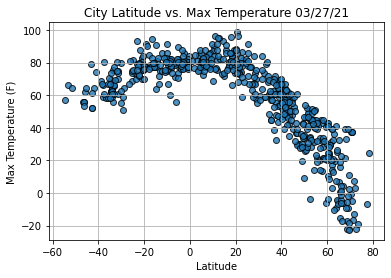

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

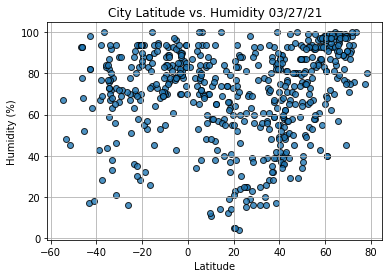

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

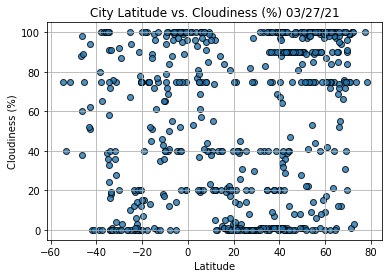

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()